## Liga Acadêmica de IA - Redes neurais

In [ ]:
import pandas as pd

cardio = pd.read_csv('heart.csv')
# referencia: https://www.kaggle.com/ronitf/heart-disease-uci

In [ ]:
cardio.head()

In [ ]:
from sklearn.model_selection import train_test_split

features = cardio.columns.tolist()
features.remove('target')

X = cardio[features]

y = cardio.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)


def plot_acc(history):
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)

### Rede neural classificadora

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

In [47]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train.values)

model = keras.Sequential([
    normalizer,
    layers.Dense(10, activation='tanh'),
    layers.Dense(5, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=83,
    validation_split = 0.2,
    batch_size=10,
    #verbose=0
    )

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_6 (Normalizati (None, 12)                25        
_________________________________________________________________
dense_26 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 6         
Total params: 216
Trainable params: 191
Non-trainable params: 25
_________________________________________________________________
Epoch 1/83
17/17 [==============================] - 0s 5ms/step - loss: -0.1481 - accuracy: 0.0000e+00 - val_loss: -6.1300 - val_accuracy: 0.0000e+00
Epoch 2/83
17/17 [==============================] - 0s 1ms/step - loss: -3.3759 - accuracy: 0.0000e+00 

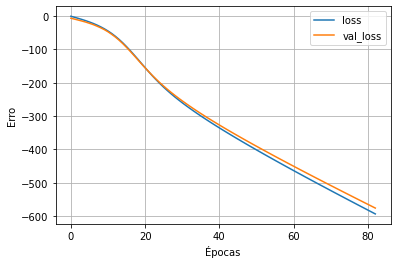

In [48]:
plot_loss(history)

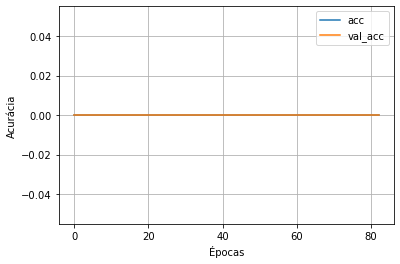

In [49]:
plot_acc(history)

In [50]:
y_pred = model.predict(X_test).reshape(-1)

from sklearn.metrics import accuracy_score

accuracy_score(np.round(y_pred), y_test)

0.0

### Redes neurais regressoras

In [51]:
from sklearn.model_selection import train_test_split

features = cardio.columns.tolist()
features.remove('age')
features.remove('target')

X = cardio[features]

y = cardio.age

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(212, 12)
(212,)
(91, 12)
(91,)


In [52]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train.values)

In [53]:
model = keras.Sequential([
    normalizer,
    layers.Dense(10),
    layers.Dense(7, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1)
])

model.summary()

model.compile(optimizer='adam',
              loss='mean_absolute_error')

history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split = 0.2,
    batch_size=8,
    #verbose=0
    )

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_7 (Normalizati (None, 12)                25        
_________________________________________________________________
dense_29 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_30 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_31 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 6         
Total params: 278
Trainable params: 253
Non-trainable params: 25
_________________________________________________________________
Epoch 1/50
22/22 [==============================] - 0s 3ms/step - loss: 53.6310 - val_loss: 51.4228
Epoch 2/50
22/22 [===

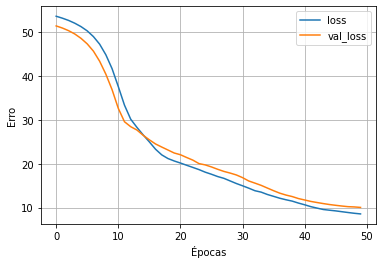

In [54]:
plot_loss(history)

In [55]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred)

[79.73626  53.245365 51.982296 64.93672  64.67598  59.02531  80.52618
 34.17693  63.538113 53.311737 48.376343 65.88476  56.239876 56.566994
 60.39394  47.414963 47.397625 64.42094  46.47819  61.22208  56.624905
 62.020786 55.636917 49.121006 22.505396 51.85689  67.00408  47.994884
 48.583103 49.94637  48.176495 48.033882 57.085308 51.888485 62.55663
 19.566202 56.787155 50.2637   49.06376  59.59253  53.086308 62.51869
 26.823015 84.82744  32.072254 52.086063 57.12343  23.864637 56.08472
 62.996857 51.132103 51.779446 56.359207 50.51024  54.22775  41.53816
 65.72077  51.053085 45.231995 38.019943 34.583576 43.234116 57.819714
 57.540997 52.08392  48.05038  63.846832 57.768982 51.911156 54.837566
 56.8238   51.681427 59.34934  34.53393  62.747463 63.640903 38.85586
 60.5199   56.298454 44.269817 51.295254 50.246593 71.34346  48.11849
 31.129087 56.96891  55.4299   56.53906  45.051754 51.0935   28.583286]


In [56]:
model.evaluate(X_test, y_test) # mae

3/3 [==============================] - 0s 1ms/step - loss: 9.7659


9.765928268432617